In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('kerala_tourism_data.csv')
df.set_index('Time format ', inplace=True)

In [13]:
df.head()

,Year,Month,No. of flights,No. of hotels booked,Tourism_in_Kerala,kerala_tourism_package,Tourist_places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min,Tourists
Time format,,,,,,,,,,,,,,,
01-2010,2010,Jan,2990.0,514000.0,87,67,10,51,78,0,35,6.8313,29.35,15.42,818356.0
02-2010,2010,Feb,2810.0,457000.0,83,78,18,44,72,0,35,20.1979,31.79,16.11,721201.0
03-2010,2010,Mar,3140.0,417000.0,93,50,9,47,66,0,90,66.8573,33.31,18.42,719944.0
04-2010,2010,Apr,2670.0,434000.0,95,97,9,49,65,0,100,94.4786,33.71,20.62,735432.0
05-2010,2010,May,2520.0,488000.0,90,69,0,54,64,0,56,112.6957,33.06,19.15,803431.0


In [68]:
# data = df.copy()  # Create a copy of the DataFrame

# month_mapping = {
#     'Jan': 1,
#     'Feb': 2,
#     'Mar': 3,
#     'Apr': 4,
#     'May': 5,
#     'Jun': 6,
#     'Jul': 7,
#     'Aug': 8,
#     'Sep': 9,
#     'Oct': 10,
#     'Nov': 11,
#     'Dec': 12
# }

# data['Month'] = data['Month'].map(month_mapping)
# data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))
# data.set_index('Date', inplace=True)

In [14]:
# Split your data into training and testing (e.g., use 2010-2018 for training and 2019 for testing)
data=df 
train_data = data['01-2010':'12-2018']
test_data = data['01-2019':'12-2019']

In [15]:
# data.info()

In [16]:
data.head()

,Year,Month,No. of flights,No. of hotels booked,Tourism_in_Kerala,kerala_tourism_package,Tourist_places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min,Tourists
Time format,,,,,,,,,,,,,,,
01-2010,2010,Jan,2990.0,514000.0,87,67,10,51,78,0,35,6.8313,29.35,15.42,818356.0
02-2010,2010,Feb,2810.0,457000.0,83,78,18,44,72,0,35,20.1979,31.79,16.11,721201.0
03-2010,2010,Mar,3140.0,417000.0,93,50,9,47,66,0,90,66.8573,33.31,18.42,719944.0
04-2010,2010,Apr,2670.0,434000.0,95,97,9,49,65,0,100,94.4786,33.71,20.62,735432.0
05-2010,2010,May,2520.0,488000.0,90,69,0,54,64,0,56,112.6957,33.06,19.15,803431.0


In [17]:
data=data[:108]

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [142]:
# Select the relevant columns
features = data[['No. of flights', 'No. of hotels booked', 'Tourism_in_Kerala', 'kerala_tourism_package', 'Tourist_places', 'Travel', 'Food_Drink', 'Flights_Kerala', 'Trains_Kerala', 'Rain', 'T_Max', 'T_Min']]
target=data[['Tourists']]

# Normalize the data

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(features)
sequence_length = 12  # You can adjust this value

X, y = [], []


for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length, 1:])  # Use iloc to select features from the second column onwards
    y.append(target.iloc[i + sequence_length, 0])  # Select the "Total Tourists" column as the target

X = np.array(X)
y = np.array(y)

X_train=X[:96]
y_train=y[:96]

model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(sequence_length, X.shape[2])))  # Adjust the input shape based on the number of input features
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))  # Output size is 1 for the "Total Tourists" prediction

# Compile the model
model.compile(optimizer='adam', loss='mse')  # You can choose a different loss function if needed

model.fit(X_train, y_train, epochs=2000, batch_size=24)  # You can adjust the number of epochs and batch size

Epoch 1/2000
4/4 [==============================] - 2s 13ms/step - loss: 1267212353536.0000
Epoch 2/2000
4/4 [==============================] - 0s 16ms/step - loss: 1267210911744.0000
Epoch 3/2000
4/4 [==============================] - 0s 18ms/step - loss: 1267204096000.0000
Epoch 4/2000
4/4 [==============================] - 0s 13ms/step - loss: 1267031998464.0000
Epoch 5/2000
4/4 [==============================] - 0s 16ms/step - loss: 1263367749632.0000
Epoch 6/2000
4/4 [==============================] - 0s 11ms/step - loss: 1204833353728.0000
Epoch 7/2000
4/4 [==============================] - 0s 11ms/step - loss: 665030361088.0000
Epoch 8/2000
4/4 [==============================] - 0s 21ms/step - loss: 249247301632.0000
Epoch 9/2000
4/4 [==============================] - 0s 19ms/step - loss: 211208765440.0000
Epoch 10/2000
4/4 [==============================] - 0s 14ms/step - loss: 131856334848.0000
Epoch 11/2000
4/4 [==============================] - 0s 15ms/step - loss: 152469094

In [163]:
# Use the last data points from the test set as input    
predictions = model.predict(X[90:96])  # Predict the "Total Tourists" for the next time step

1/1 [==============================] - 0s 26ms/step


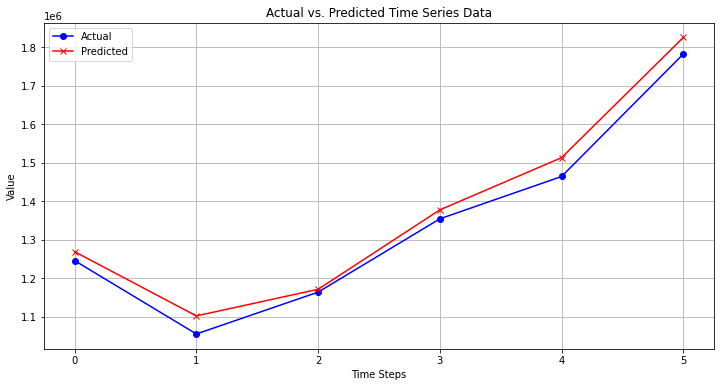

In [175]:
import matplotlib.pyplot as plt

# Inverse transform the actual test data to get it in the original scale

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y[90:96], label='Actual', color='blue', marker='o')
plt.plot(predictions, label='Predicted', color='red', marker='x')
plt.title('Actual vs. Predicted Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [177]:
y_act2=y[90:96]
y_pred2=predictions
import numpy as np

# Calculate MAE (Mean Absolute Error)
mae = np.mean( np.abs(y_act2 - y_pred2) )

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt( np.mean((y_act2 - y_pred2) ** 2) )

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean( np.abs((y_act2 - y_pred2))  ) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 265925.36805555556
RMSE: 337975.85754192126
MAPE: 26592536.805555556


In [42]:
y_pred2

array([[1359097.8],
       [1194220.1],
       [1106917.9],
       [1291414.9],
       [1384874.6],
       [1071419.9],
       [1170115.9],
       [1217180.1],
       [1285246.5],
       [1413692.4],
       [1541778.6],
       [1736615.8],
       [1584098.6],
       [1389820.6],
       [1358453.6],
       [1566109.1],
       [1575987.5],
       [1168796.4],
       [1207600.6],
       [1075409.1],
       [1126862.6],
       [1368409.2],
       [1471415.2],
       [1812638.4]], dtype=float32)

In [30]:
y_pred2

array([[1515374.6],
       [1292206.2],
       [1356032.9],
       [1518125. ],
       [1420298.5],
       [1131218.8],
       [1143414. ],
       [1072220.2],
       [1128335.5],
       [1312536.2],
       [1483314.6],
       [1664072.6]], dtype=float32)

In [34]:
y[96:108]

array([], dtype=float64)

In [33]:
y

array([ 872030.,  770512.,  753599.,  779712.,  853926.,  680654.,
        684737.,  776193.,  791985., 1013044.,  987385., 1150663.,
        937791.,  815119.,  803386.,  821615.,  923932.,  724177.,
        722192.,  837464.,  862020., 1122220., 1081390., 1219244.,
       1026830.,  887283.,  865039.,  879626., 1019007.,  774461.,
        769908.,  907513.,  943445., 1183420., 1155608., 1303814.,
       1116473.,  969718.,  939050.,  956550., 1130388.,  831745.,
        826525.,  969382., 1024381., 1246412., 1230830., 1377323.,
       1171592., 1063128., 1007669., 1032072., 1203223.,  893161.,
        899444., 1042686., 1103688., 1311865., 1283466., 1431056.,
       1213770., 1146254., 1067504., 1090943., 1244344.,  928982.,
        970552., 1124432., 1191859., 1419742., 1283775., 1527797.,
       1371882., 1169652., 1122018., 1295885., 1387403., 1071401.,
       1155714., 1212269., 1243659., 1459147., 1508638., 1767722.,
       1590463., 1378781., 1349162., 1556044., 1639759., 11209

In [60]:
import numpy as np

# Assuming y_act1 and y_pred1 are NumPy arrays
y_act1 = np.array([1371882., 1169652., 1122018., 1295885., 1387403., 1071401.,
                   1155714., 1212269., 1243659., 1459147., 1508638., 1767722.,
                   1590463., 1378781., 1349162., 1556044., 1639759., 1120984.,
                   1245862., 1055698., 1164214., 1354291., 1464076., 1781733.])

y_pred1 = np.array([[1334964.8], [1126671.8], [1101899.2], [1273052.],
                   [1335171.2], [1044277.5], [1109315.6], [1214128.8],
                   [1229625.6], [1392470.6], [1517593.6], [1689779.8],
                   [1553321.5], [1349165.8], [1300200.4], [1506256.8],
                   [1582962.4], [1119057.1], [1195778.6], [1031455.],
                   [1113563.1], [1298442.9], [1443975.6], [1733214.9]])

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_act1 - y_pred1))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_act1 - y_pred1)**2))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_act1 - y_pred1) / y_act1)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 231110.96597222224
RMSE: 287424.881163643
MAPE: 16.954663257435648
